# question num 1
# step 1: load the dataset 

In [1]:
#importing the libraries
import pandas as pd

In [2]:
#reading the csv file
df= pd.read_csv("C:/Users/Raghavendra K/OneDrive/Desktop/powerBI/AdaptReady/complaints.csv")

C:\Users\Raghavendra K\AppData\Local\Temp\ipykernel_19880\292800762.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/Raghavendra K/OneDrive/Desktop/powerBI/AdaptReady/complaints.csv")


In [3]:
#to count the length of the file 
df.apply(len)

Date received                   5243000
Product                         5243000
Sub-product                     5243000
Issue                           5243000
Sub-issue                       5243000
Consumer complaint narrative    5243000
Company public response         5243000
Company                         5243000
State                           5243000
ZIP code                        5243000
Tags                            5243000
Consumer consent provided?      5243000
Submitted via                   5243000
Date sent to company            5243000
Company response to consumer    5243000
Timely response?                5243000
Consumer disputed?              5243000
Complaint ID                    5243000
dtype: int64

#  step 2: analyze trends over time

<Axes: title={'center': 'Trends Over Time'}, xlabel='Date', ylabel='Number of Complaints'>

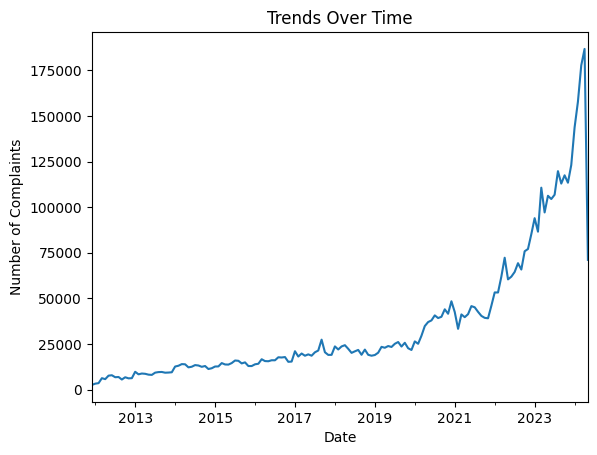

In [4]:
# Convert date column to datetime
df['Date received'] = pd.to_datetime(df['Date received'])
df['YearMonth'] = df['Date received'].dt.to_period('M')
trend = df.groupby('YearMonth').size()
# Plotting the graph 
trend.plot(kind='line', title='Trends Over Time', xlabel='Date', ylabel='Number of Complaints')


In [5]:
#Creating time series of complaint 

In [6]:

# Group by month and year
df['YearMonth'] = df['Date received'].dt.to_period('M')
trend = df.groupby('YearMonth').size()

# Convert to a DataFrame for easier handling
trend_df = trend.to_frame(name='Number of Complaints').reset_index()
trend_df['YearMonth'] = trend_df['YearMonth'].astype(str)


In [7]:
#Visualize the Trend

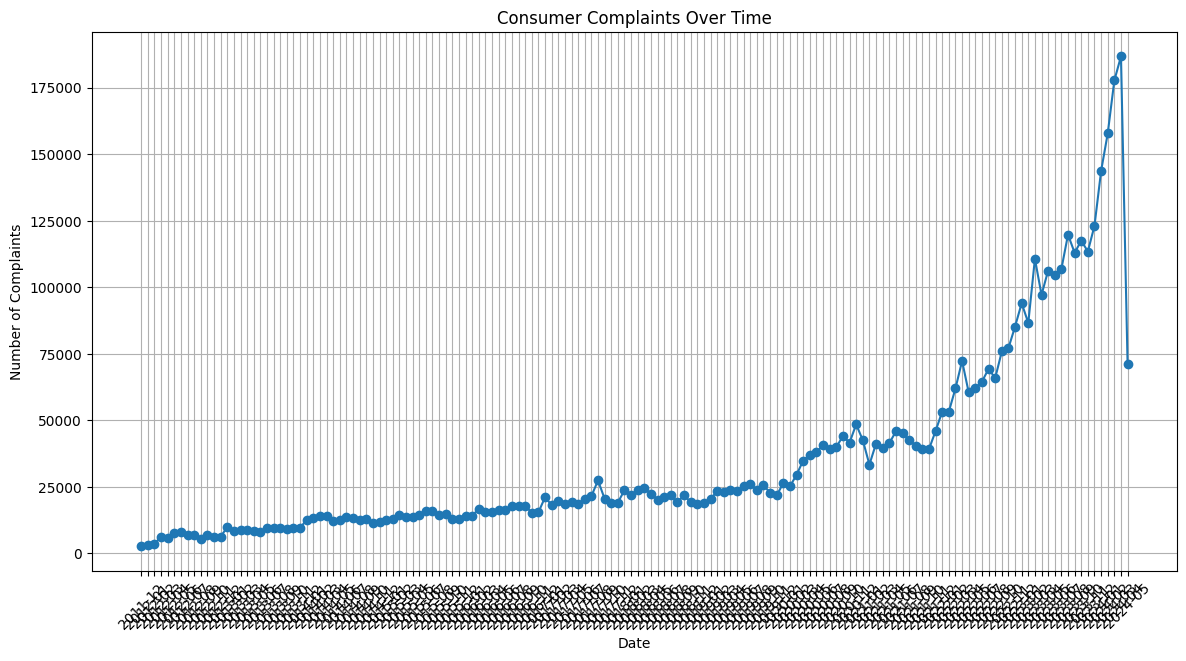

In [8]:
import matplotlib.pyplot as plt

# Plot the trend
plt.figure(figsize=(14, 7))
plt.plot(trend_df['YearMonth'], trend_df['Number of Complaints'], marker='o', linestyle='-')
plt.title('Consumer Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# step 3: product analysis

<Axes: title={'center': 'Complaints by Product'}, xlabel='Product', ylabel='Number of Complaints'>

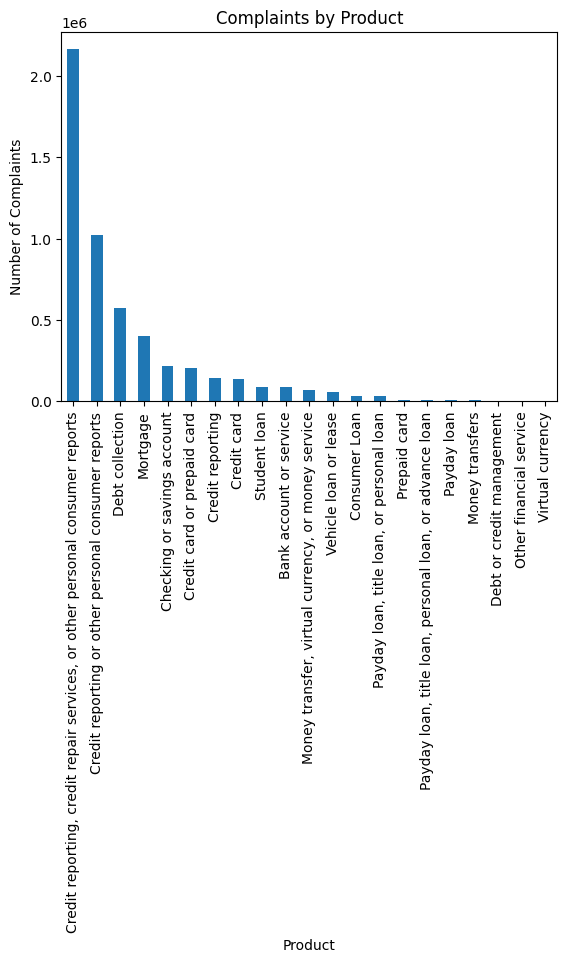

In [9]:
# Count complaints by product
product_counts = df['Product'].value_counts()

# Plot analysis
product_counts.plot(kind='bar', title='Complaints by Product', xlabel='Product', ylabel='Number of Complaints')


In [10]:
#showing where companies need to focus their improvement efforts. 
#It helps businesses address real consumer complaints more effectively
product_issues = df.groupby(['Product', 'Issue']).size().unstack(fill_value=0)
# Finding the top issue
top_issues = product_issues.idxmax(axis=1)
issue_counts = product_issues.max(axis=1)

# DataFrame
top_issues_df = pd.DataFrame({'Top Issue': top_issues, 'Issue Count': issue_counts})
# Display
print(top_issues_df)


                                                                                          Top Issue  \
Product                                                                                               
Bank account or service                                     Account opening, closing, or management   
Checking or savings account                                                     Managing an account   
Consumer Loan                                                            Managing the loan or lease   
Credit card                                                                        Billing disputes   
Credit card or prepaid card                         Problem with a purchase shown on your statement   
Credit reporting                                             Incorrect information on credit report   
Credit reporting or other personal consumer rep...             Incorrect information on your report   
Credit reporting, credit repair services, or ot...             Incorrect 

# step 4: Company Performance

In [11]:
#This helps identify which companies get the most complaints and indicating where they need to improve their customer service

<Axes: title={'center': 'Complaints by Company'}, xlabel='Company', ylabel='Number of Complaints'>

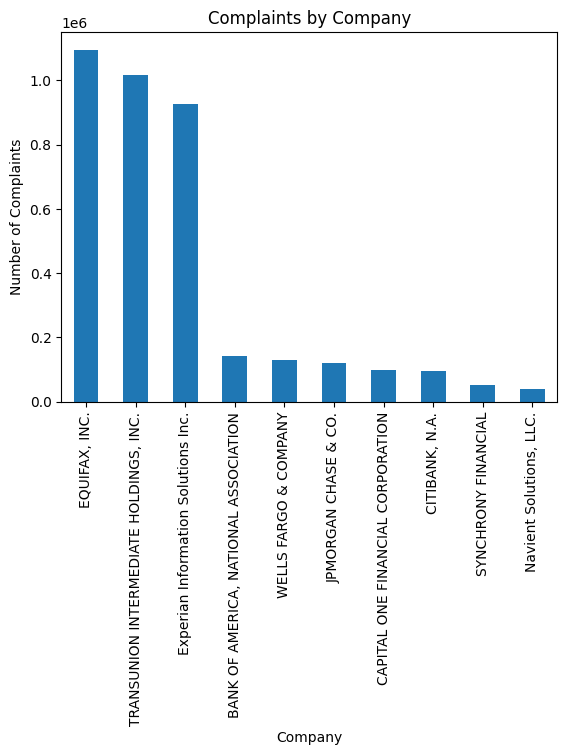

In [12]:
# Count complaints by company
company_counts = df['Company'].value_counts().head(10) 
# Top 10 companies for clarity

# Plotting the graph 
company_counts.plot(kind='bar', title='Complaints by Company', xlabel='Company', ylabel='Number of Complaints')


In [13]:
#WHERE WE ARE ANALYSING THE NUMBER OF COMPLAINTS FROM THE COMPANIES TO UNDERSTAND THE PERFORMANCE 

In [14]:
# Count complaints by company
company_counts = df['Company'].value_counts()

# num of complaints per company
average_complaints_per_company = company_counts.mean()
print(f"Average number of complaints per company: {average_complaints_per_company:.2f}")


Average number of complaints per company: 726.18


# step 5: geographic distribution

<Axes: title={'center': 'Complaints by State'}, xlabel='State', ylabel='Number of Complaints'>

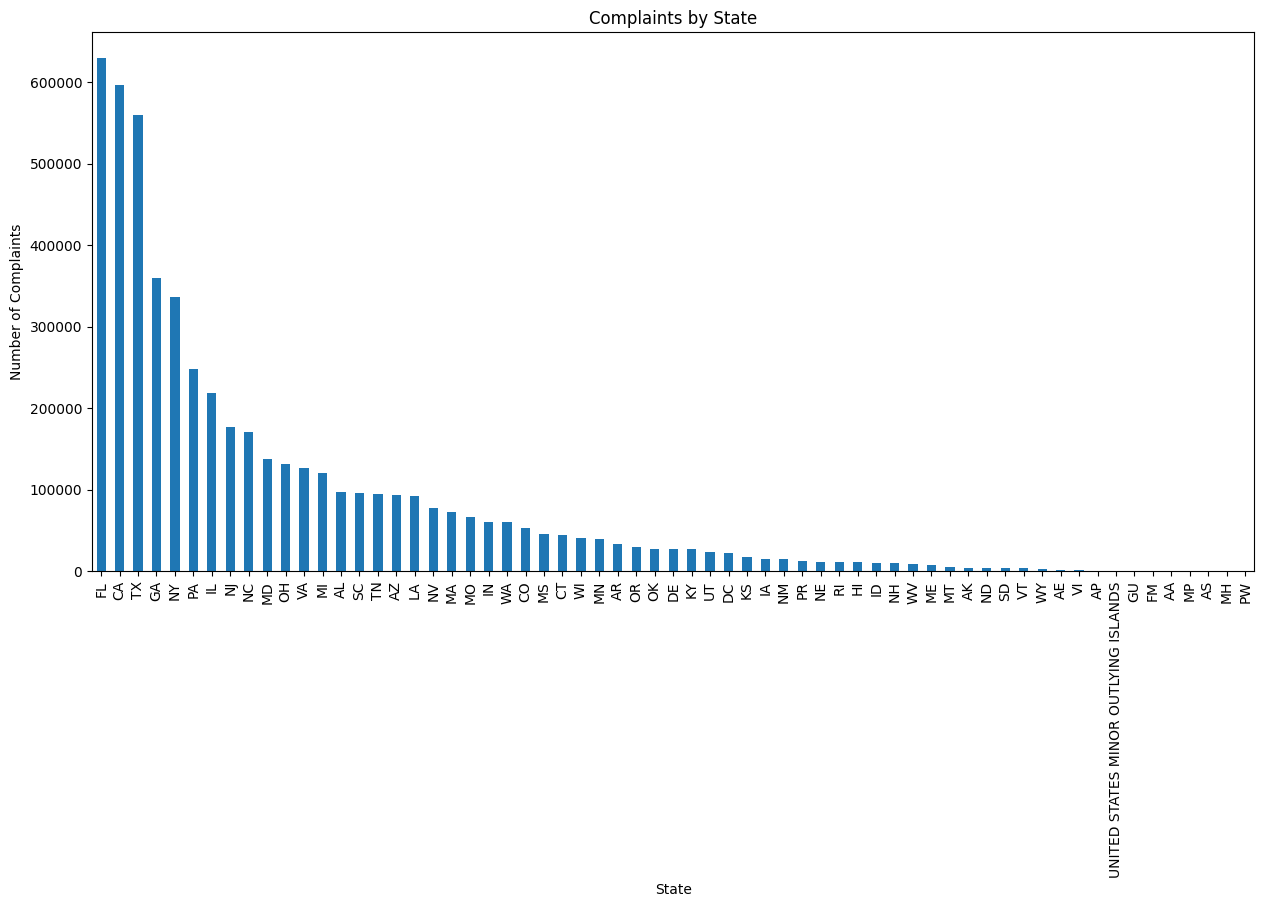

In [15]:
#This analysis tells where complaints are most frequent & helping to identify states with regional issues. 
#It provides specific areas needing improvement.
#complaints by state
state_counts = df['State'].value_counts()

# Plot geographic distribution
state_counts.plot(kind='bar', title='Complaints by State', xlabel='State', ylabel='Number of Complaints', figsize=(15, 7))


# question num 2

In [1]:
#both example 1 and 2
def findLengthOfLCIS(nums):
    if not nums:
        return 0

    max_length = 1
    current_length = 1

    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1

    return max_length

# Example usage:
nums1 = [1, 3, 5, 4, 7]
print(findLengthOfLCIS(nums1))  

nums2 = [2, 2, 2, 2, 2]
print(findLengthOfLCIS(nums2))

#OR 

'''def findLengthOfLCIS(nums):
    if not nums:
        return 0

    max_length = 1
    current_length = 1

    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1

    return max_length

# Example usage:
if __name__ == "__main__":
    # Take input from the user
    input_str = input("Enter numbers separated by spaces: ")
    nums = list(map(int, input_str.split()))

    # Find the length of the longest continuous increasing subsequence
    result = findLengthOfLCIS(nums)
    print("Length of the longest continuous increasing subsequence:", result)'''
 


3
1


# question num 4

In [6]:
import json
import csv
# Read the JSON file
with open("C:/Users/Raghavendra K/Downloads/DT A1 sample_json .json", 'r') as file:
    data = json.load(file)
# Open a CSV file for writing
with open('servlets.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(['servlet-name', 'servlet-class'])

    # Extract and write the data
    servlets = data['web-app']['servlet']
    for servlet in servlets:
        servlet_name = servlet.get('servlet-name')
        servlet_class = servlet.get('servlet-class')
        csvwriter.writerow([servlet_name, servlet_class])

# question num 3

In [7]:
#here where we  converting the string for the concatenation 
#the numbers are arranged to form largest possible concatenated as result
from functools import cmp_to_key

def largestNumber(nums):
    if not nums:
        return ""
    nums_str = list(map(str, nums))
    def compare(x, y):
        if x + y > y + x:
            return -1
        elif x + y < y + x:
            return 1
        else:
            return 0
    nums_str.sort(key=cmp_to_key(compare))
    if nums_str[0] == '0':
        return '0'
    return ''.join(nums_str)

nums1 = [10, 2]
print(largestNumber(nums1)) 

nums2 = [3, 30, 34, 5, 9]
print(largestNumber(nums2)) 


210
9534330
